In [156]:
import os
import sys
import random
import json
import collections
import itertools

import pandas as pd
import numpy as np
import scipy        
import statsmodels


from tqdm import trange, tqdm_notebook as tqdm
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns = 999

sns.set()

plt.rcParams["figure.figsize"] = (10,7)

In [157]:
os.getcwd()

'/home/boris/study/UT study/ACM Sigmod/sigmod/notebooks'

In [158]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [159]:
from sigmod_src.utils import read_json, pprint_json, path_from_spec_id, get_vector_for_spec_id, make_classes_df
from sigmod_src.embedding import Embedder

# Load data

In [106]:
LABELS_PATH = '../data/raw/sigmod_large_labelled_dataset.csv'

In [107]:
labels_df = pd.read_csv(LABELS_PATH)
labels_df.shape

(297651, 3)

In [108]:
labels_df.head()

,left_spec_id,right_spec_id,label
0,www.ebay.com//53278,www.garricks.com.au//31,1
1,www.ebay.com//24817,www.ebay.com//58782,0
2,www.ebay.com//43019,www.ebay.com//58782,0
3,www.ebay.com//42055,www.ebay.com//54403,0
4,buy.net//6145,www.ebay.com//44280,0


# Load specs df

In [109]:
specs_df = pd.read_csv('../data/processed/specs.csv')
specs_df.index=  specs_df.spec_id
specs_df.shape

(29694, 8)

In [110]:
specs_df[specs_df.page_title.isnull()]

,spec_id,page_title,brand,model,all_text,page_title_stem,all_text_stem,site
spec_id,,,,,,,,


In [111]:
specs_df.head()

,spec_id,page_title,brand,model,all_text,page_title_stem,all_text_stem,site
spec_id,,,,,,,,
www.ebay.com//57656,www.ebay.com//57656,canon powershot elph 110 hs 16-1-mp digital,canon,NaN,canon powershot 110 hs 16-1-mp digital canon r...,canon powershot elph 110 hs 16-1-mp digit,canon powershot 110 hs 16-1-mp digit canon ref...,www.ebay.com
www.ebay.com//60583,www.ebay.com//60583,canon rebel 2000 35mm great case instruction b...,canon,NaN,canon rebel 2000 35mm great case instruction b...,canon rebel 2000 35mm great case instruct booklet,canon rebel 2000 35mm great case instruct book...,www.ebay.com
www.ebay.com//60440,www.ebay.com//60440,canon eos rebel t3i digital slr 18 55mm 75 300...,canon,t3i,canon eos rebel t3i digital slr 18 55mm 75 300...,canon eo rebel t3i digit slr 18 55mm 75 300mm ...,canon eo rebel t3i digit slr 18 55mm 75 300mm ...,www.ebay.com
www.ebay.com//24139,www.ebay.com//24139,ge c1033 10-1-mp digital 3x zoom 2 4 lcd,NaN,c1033,ge c1033 10-1-mp digital 3x zoom 2 4 ge brand-...,ge c1033 10-1-mp digit 3x zoom 2 4 lcd,ge c1033 10-1-mp digit 3x zoom 2 4 ge brand-ne...,www.ebay.com
www.ebay.com//54903,www.ebay.com//54903,vivitar clip shot digital 1-1-mp,vivitar,NaN,vivitar clip shot digital 1-1-mp vivitar brand...,vivitar clip shot digit 1-1-mp,vivitar clip shot digit 1-1-mp vivitar brand-n...,www.ebay.com


In [112]:
specs_df.page_title.sample(5).values[0]

'e-pl2 olympus pen e-pl2 digital w 14-42mm ii lens buzzillions com'

In [113]:
specs_df.page_title_stem.sample(5).values[0]

'canon powershot s110 12-1-mp digit 013803157161'

# Make embedder and index

In [114]:
# emb = Embedder.load('../models/embedder')

In [115]:
# emb = Embedder(vector_size=200,
#                train_epochs=100,
#                index_trees=1000)

In [116]:
# emb.fit(specs_df.page_title_stem, specs_df.spec_id)

# Visual evaluation

In [117]:
# random_spec = specs_df.sample(1).iloc[0]
# spec_id = random_spec.spec_id
# text = random_spec.page_title_stem

# nn_ids = emb.lookup_ids(text, n=100)
# nn_texts =  emb.lookup_texts(text, n=100)

# print(f'Query:\n\t{text}')
# newline_ = '\n\t'
# print(f'3 Closest:\n\t{newline_.join(nn_texts[:3])}')

# print(f'Most distant:\n\t{nn_texts[-1]}')

# Obtian labelled dataset recall

In [118]:
# def get_candidate_specs(query_text, emb, n):
#     nn_spec_ids = emb.lookup_ids(query_text, n=n)
#     return nn_spec_ids

# dups_df = labels_df[labels_df.label==1]
# results = []
# print(int(0.5*len(dups_df)))
# for row in tqdm(dups_df.sample(int(0.5*len(dups_df))).itertuples()):
#     left_spec = specs_df.loc[row.left_spec_id]
#     candidates = emb.lookup_ids(left_spec.page_title_stem, n=500, search_k=1500)
#     target_index = None
#     if row.right_spec_id in candidates:
#         target_index = list(candidates).index(row.right_spec_id)
    
    
#     results.append((row.left_spec_id, row.right_spec_id, target_index))

In [119]:
# results_df = pd.DataFrame(results)
# results_df.columns = ['left_spec_id', 'right_spec_id', 'right_spec_rank']
# results_df.head()

In [120]:
def compute_recall_k(ranks, k):
    total_number = len(ranks)
    matched_number = ranks[(~ranks.isnull()) & (ranks <= k)]
    return len(matched_number)/total_number

In [121]:
# ks = [1, 10, 50, 100, 500, 1000]
# for k in ks:
#     print(f'Recall-{k}: ', round(compute_recall_k(results_df.right_spec_rank, k), 4))

# Visualize embedding

## Obtain classes from labels

Each class - camera model. All specs that are duplicates of eachother consitute the same class. In a graph one class = one connected component.

In [122]:
classes_df = make_classes_df(labels_df)

In [123]:
classes_df.head()

,spec_id,class_
0,buy.net//5641,0
1,www.ebay.com//54217,0
2,www.ebay.com//58588,0
3,www.ebay.com//59612,0
4,www.gosale.com//849,0


In [124]:
classes_df.index = classes_df.spec_id

## Get spec vectors

In [317]:
specs_df.shape

(29694, 8)

In [318]:
embeddings = pd.read_csv('../data/processed/embeddings.csv')

In [319]:
embeddings.shape

(29694, 50)

In [320]:
vecs = embeddings.values

In [321]:
vecs.shape

(29694, 50)

In [322]:
vecs = pd.DataFrame(vecs, index=specs_df.spec_id)
vecs.shape

(29694, 50)

In [323]:
vecs.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
spec_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
www.ebay.com//57656,0.0,0.0,0.0,0.0,0.0,0.543518,0.0,0.0,0.152717,0.0,0.0,0.0,0.0,0.422614,0.0,0.531746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400646,0.0,0.0,0.229439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.082160,0.0,0.0
www.ebay.com//60583,0.0,0.0,0.0,0.0,0.0,0.543516,0.0,0.0,0.152718,0.0,0.0,0.0,0.0,0.422619,0.0,0.531746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400643,0.0,0.0,0.229439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.082162,0.0,0.0
www.ebay.com//60440,0.0,0.0,0.0,0.0,0.0,0.543518,0.0,0.0,0.152713,0.0,0.0,0.0,0.0,0.422594,0.0,0.531749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400672,0.0,0.0,0.229431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.082148,0.0,0.0
www.ebay.com//24139,0.0,0.0,0.0,0.0,0.0,0.543518,0.0,0.0,0.152721,0.0,0.0,0.0,0.0,0.422613,0.0,0.531747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400644,0.0,0.0,0.229436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.082163,0.0,0.0
www.ebay.com//54903,0.0,0.0,0.0,0.0,0.0,0.543533,0.0,0.0,0.152692,0.0,0.0,0.0,0.0,0.422588,0.0,0.531748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400660,0.0,0.0,0.229441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.082155,0.0,0.0


## Pairwise distances distirubtion

In [324]:
from scipy.spatial.distance import pdist, cdist

In [325]:
sample_features = vecs.sample(5000)

In [326]:
pairwise_distances = pdist(sample_features.values)

In [327]:
pairwise_distances[:10]

array([1.29002363e-05, 0.00000000e+00, 5.33376612e-05, 3.27480015e-06,
       1.29980151e-05, 1.38955617e-05, 3.75912306e-05, 2.36752900e-05,
       8.60990482e-06, 5.51772272e-06])

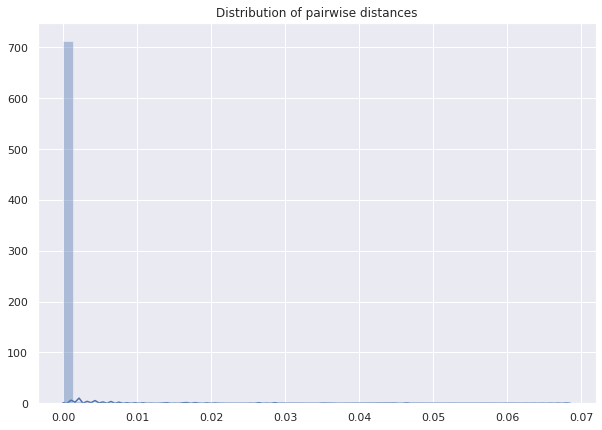

In [328]:
plt.figure()
plt.title('Distribution of pairwise distances')
sns.distplot(pairwise_distances)
plt.show()

In [329]:
# Vector for spec
vecs.loc['www.ebay.com//42835'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: www.ebay.com//42835, dtype: float64

In [330]:
dup_df = labels_df[labels_df.label==1]

In [331]:
duplicate_pairs = dup_df.sample(10000)[['left_spec_id', 'right_spec_id']].values

duplicate_vector_pairs = []
for s1, s2 in duplicate_pairs:
    duplicate_vector_pairs.append([
        vecs.loc[s1],
        vecs.loc[s2]
    ])
    
duplicate_vector_pairs = np.array(duplicate_vector_pairs)

#duplicate_vector_pairs[:3]

In [332]:
non_duplicate_pairs = labels_df[labels_df.label==0].sample(10000)[['left_spec_id', 'right_spec_id']].values

non_duplicate_vector_pairs = []
for s1, s2 in non_duplicate_pairs:
    non_duplicate_vector_pairs.append([
        vecs.loc[s1],
        vecs.loc[s2]
    ])

        
non_duplicate_vector_pairs = np.array(non_duplicate_vector_pairs)
# non_duplicate_vector_pairs[:3]

In [333]:
duplicate_vector_pairs.shape

(10000, 2, 50)

In [334]:
def compute_pairwise_distances(pairs_arr):
    dists = []
    for i in range(len(pairs_arr)):
        dists.append(pdist(pairs_arr[i])[0])
    return dists

In [335]:
duplicate_vector_pairs.shape

(10000, 2, 50)

In [336]:
duplicate_distances = compute_pairwise_distances(duplicate_vector_pairs)
non_duplicate_distances = compute_pairwise_distances(non_duplicate_vector_pairs)

In [337]:
len(duplicate_distances), len(non_duplicate_distances)

(10000, 10000)

In [338]:
duplicate_distances[:10]

[5.582212908875964e-05,
 1.214784491173814e-05,
 0.0,
 1.2018994799939631e-05,
 5.8562943061253796e-05,
 7.614402471636107e-06,
 2.461793606293622e-05,
 2.6269366189631813e-06,
 3.9195147659085136e-06,
 2.8123043932005366e-06]

In [339]:
non_duplicate_distances[:10]

[0.0039395786437765425,
 2.0857249962548293e-05,
 2.4913424092266344e-05,
 6.455578084876714e-05,
 5.54341916148876e-06,
 9.517651811258448e-06,
 1.6709353667943963e-05,
 3.104244030358803e-05,
 3.496428463444103e-05,
 2.6585821409150595e-05]

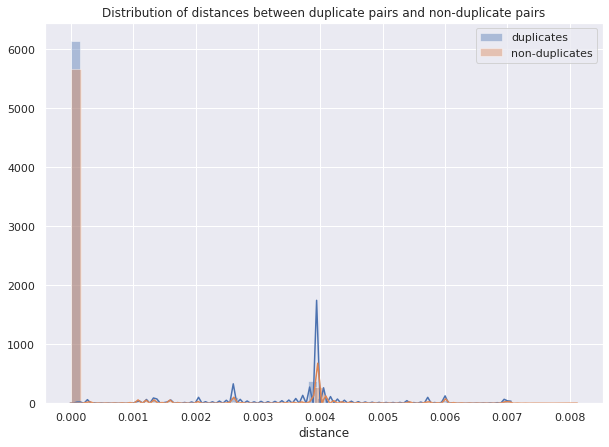

In [340]:
plt.figure()
plt.title('Distribution of distances between duplicate pairs and non-duplicate pairs')
sns.distplot(duplicate_distances, label='duplicates')
sns.distplot(non_duplicate_distances, label='non-duplicates')
plt.legend()
plt.xlabel('distance')
plt.show()

# TSNE visualization

In [309]:
from MulticoreTSNE import MulticoreTSNE as TSNE

In [310]:
tsne = TSNE(
    n_components=2,
    metric='cosine',
    n_jobs=3,
    verbose=True,
)

In [311]:
spec_features_ld = tsne.fit_transform(vecs)

In [312]:
spec_features_ld.shape

(29694, 2)

In [313]:
spec_features_ld = pd.DataFrame(spec_features_ld, index=specs_df.spec_id)
spec_features_ld['class_'] = classes_df.class_
spec_features_ld.shape

(29694, 3)

In [314]:
specs_df.iloc[46]

spec_id                                          www.ebay.com//41954
page_title                     canon eos 20d 8-2-mp digital slr body
brand                                                          canon
model                                                            20d
all_text           canon eos 20d 8-2-mp digital slr body canon ex...
page_title_stem                   canon eo 20d 8-2-mp digit slr bodi
all_text_stem      canon eo 20d 8-2-mp digit slr bodi canon extra...
site                                                    www.ebay.com
Name: www.ebay.com//41954, dtype: object

In [315]:
spec_features_ld.iloc[46]

0        -21.278856
1        -26.234839
class_    10.000000
Name: www.ebay.com//41954, dtype: float64

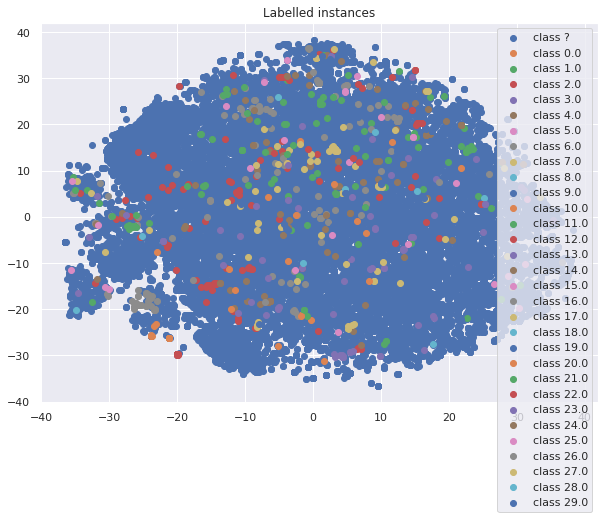

In [316]:
plt.figure()
plt.title('Labelled instances')
class_ld_df = spec_features_ld[pd.isnull(spec_features_ld.class_)]
plt.scatter(class_ld_df.iloc[:, 0], class_ld_df.iloc[:, 1], label=f'class ?')

for class_ in spec_features_ld['class_'].sort_values().unique():
    if pd.isnull(class_):
        continue
    class_ld_df = spec_features_ld[spec_features_ld.class_==class_]
    plt.scatter(class_ld_df.iloc[:, 0], class_ld_df.iloc[:, 1], label=f'class {class_}')

plt.legend()
plt.show()